In [1]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import nltk.sentiment

plt.rc('figure', figsize=(24, 24))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')

from wordcloud import WordCloud

import prepare

# Exercises

### 1. Spam Data

Load the spam data set.

In [2]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

df = pd.read_csv('spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [3]:
all_words = clean(' '.join(df.text))
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

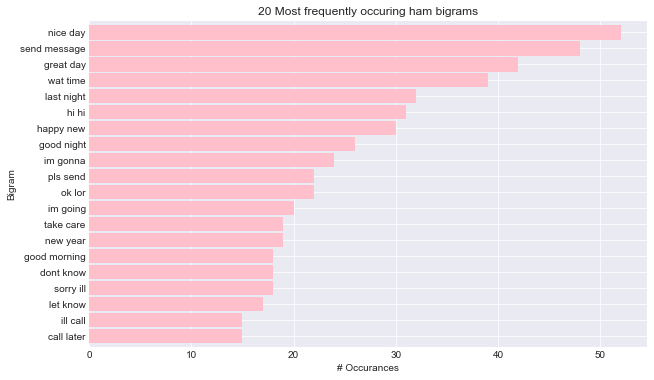

In [4]:
top_20_ham_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [5]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

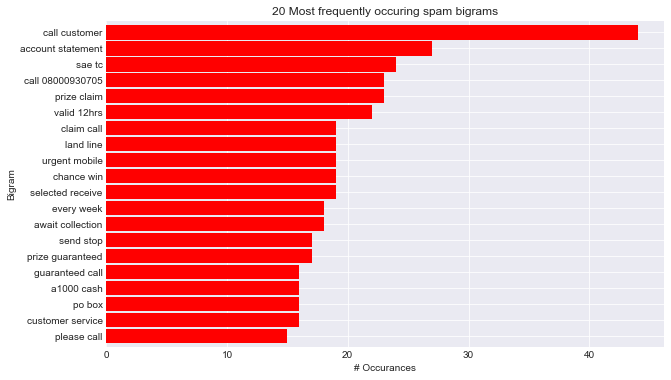

In [6]:
top_20_spam_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

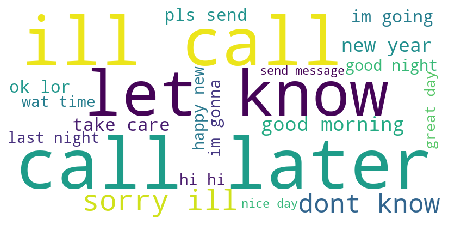

In [7]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

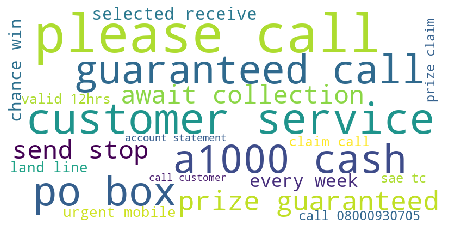

In [8]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

Is there any overlap in the bigrams for the spam data and the ham data?

In [9]:
# not really, the 'please call' and 'call later' are similar, but still different

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [10]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
dtype: int64

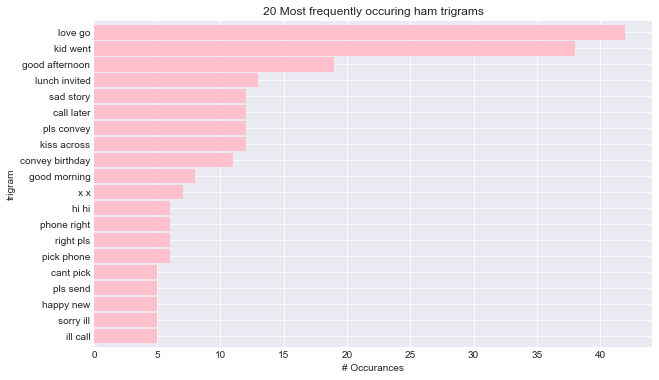

In [11]:
top_20_ham_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [12]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(reply, call, 08000930705)    14
(land, line, claim)           14
(private, 2003, account)      13
dtype: int64

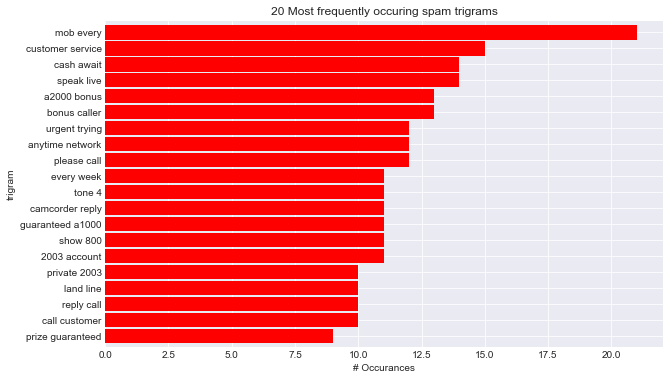

In [13]:
top_20_spam_trigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam trigrams')
plt.ylabel('trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 2399.5, 1199.5, -0.5)

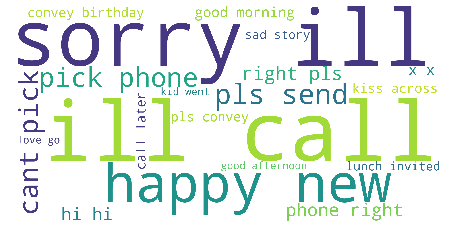

In [14]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=2400, height=1200).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 2399.5, 1199.5, -0.5)

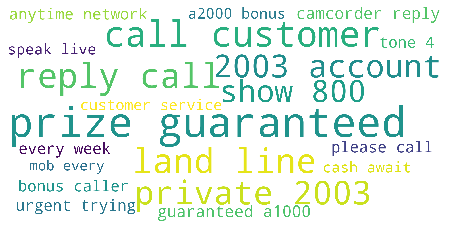

In [15]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=2400, height=1200).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [16]:
codeup_df = pd.read_csv('codeup_blogs.csv', index_col=0)
codeup_df = prepare.prep_article(codeup_df)
codeup_df

,title,content,stemmed,lemmatized,clean
0,From Bootcamp to Bootcamp: Two Military Vetera...,Are you a veteran or active-duty military memb...,are you a veteran or activeduti militari membe...,are you a veteran or activeduty military membe...,veteran activeduty military member considering...
1,How to Get Started On Any Programming Exercise,Programming is hard. Whether you’re just begin...,program is hard whether your just begin to lea...,programming is hard whether youre just beginni...,programming hard whether youre beginning learn...
2,The Best Path to a Career in Data Science,"In our blog, “The Best Path To A Career In Sof...",in our blog the best path to a career in softw...,in our blog the best path to a career in softw...,blog best path career software development loo...
3,Getting Hired in a Remote Environment,As a career accelerator with a tuition refund ...,as a career acceler with a tuition refund guar...,a a career accelerator with a tuition refund g...,career accelerator tuition refund guarantee al...
4,The Remote Codeup Student Experience,Communities across Texas have now lived in a r...,commun across texa have now live in a remot en...,community across texas have now lived in a rem...,community across texas lived remote environmen...
...,...,...,...,...,...
94,Press Release: Free Learn to Code Bootcamp for...,Press Release: Free Learn to Code Bootcamp for...,press releas free learn to code bootcamp for v...,press release free learn to code bootcamp for ...,press release free learn code bootcamp veteran...
95,What The SA Tech Job Fair Says About San Antonio,What The SA Tech Job Fair Says About San Anton...,what the sa tech job fair say about san antoni...,what the sa tech job fair say about san antoni...,sa tech job fair say san antonio last night co...
96,Why Choose Codeup?,Why Choose Codeup?Prospective students sometim...,whi choos codeupprospect student sometim ask a...,why choose codeupprospective student sometimes...,choose codeupprospective student sometimes ask...
97,Use Your Texas Unemployment Benefits at Codeup,Use Your Texas Unemployment Benefits at Codeup...,use your texa unemploy benefit at codeupelig a...,use your texas unemployment benefit at codeupe...,use texas unemployment benefit codeupeligible ...


In [17]:
codeup_words = ' '.join(codeup_df.clean)
codeup_words

"veteran activeduty military member considering next step alumnus boot recent virtual panel two vet discussed transition technology career codeup benny field iii retired air force master sergeant turned full stack web developer jeffery roeder navy intelligence analyst turned data scientist whether youre interested data science web development key takeaway event codeupthe gi bill wa huge plus icing cake wa placement program benny fieldsafter retiring air force benny field took job technical writer quickly became interested software wa writing writing friend suggested looking coding bootcamp liked codeup accepts gi bill icing cake wa learning work student placement team doe get hiredwhat doe codeups student placement team dotheyll give every imaginable tool get placed ton connection crazy college arent gonna jeff roederwell buff resume set mock interview give knowhow nail interview get job offer dress say thank letter jeff best well give every imaginable tool get placed new career backed

In [18]:
tokenizer = nltk.tokenize.ToktokTokenizer()
codeup_freq = tokenizer.tokenize(codeup_words)
codeup_freq = pd.Series(codeup_freq).value_counts()
codeup_freq.head()

codeup     433
wa         320
data       309
job        198
student    197
dtype: int64

(-0.5, 3599.5, 3599.5, -0.5)

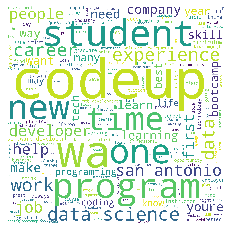

In [19]:
wc = WordCloud(background_color='white', width=3600, height=3600)
img = wc.generate(codeup_words)

plt.imshow(img)
plt.axis('off')

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [20]:
inshort_df = pd.read_csv('inshort_articles.csv', index_col=0)
inshort_df = prepare.prep_article(inshort_df)
inshort_df.head()

,title,content,category,stemmed,lemmatized,clean
0,"Twitter CEO donates $10M to project giving $1,...",Twitter's billionaire CEO Jack Dorsey has dona...,business,twitter ' s billionair ceo jack dorsey ha dona...,twitter ' s billionaire ceo jack dorsey ha don...,twitter ' billionaire ceo jack dorsey donated ...
1,India's economic growth seen at 1.2% in Q4 FY2...,India's economy is estimated to have grown at ...,business,india ' s economi is estim to have grown at 12...,india ' s economy is estimated to have grown a...,india ' economy estimated grown 12 quarter end...
2,Firm whose stock surged 1000% in 2020 starts h...,US biotech company Novavax said it has started...,business,us biotech compani novavax said it ha start ph...,u biotech company novavax said it ha started p...,u biotech company novavax started phase 1 clin...
3,Nokia shuts plant in Tamil Nadu after some emp...,Nokia on Tuesday said it suspended operations ...,business,nokia on tuesday said it suspend oper at it te...,nokia on tuesday said it suspended operation a...,nokia tuesday suspended operation telecom gear...
4,Glenmark to start clinical trial to test poten...,Glenmark Pharmaceuticals on Tuesday said it wi...,business,glenmark pharmaceut on tuesday said it will be...,glenmark pharmaceutical on tuesday said it wil...,glenmark pharmaceutical tuesday begin new clin...


In [21]:
business_words = ' '.join(inshort_df[inshort_df.category == 'business'].clean)
entertainment_words = ' '.join(inshort_df[inshort_df.category == 'entertainment'].clean)
technology_words = ' '.join(inshort_df[inshort_df.category == 'technology'].clean)
sports_words = ' '.join(inshort_df[inshort_df.category == 'sports'].clean)

(-0.5, 3599.5, 3599.5, -0.5)

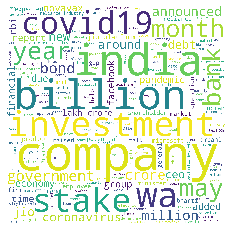

In [22]:
wc = WordCloud(background_color='white', width=3600, height=3600)
img = wc.generate(business_words)

plt.imshow(img)
plt.axis('off')

(-0.5, 3599.5, 3599.5, -0.5)

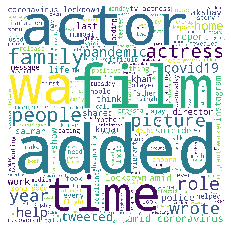

In [23]:
wc = WordCloud(background_color='white', width=3600, height=3600)
img = wc.generate(entertainment_words)

plt.imshow(img)
plt.axis('off')

(-0.5, 3599.5, 3599.5, -0.5)

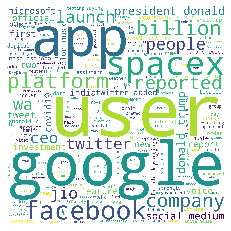

In [24]:
wc = WordCloud(background_color='white', width=3600, height=3600)
img = wc.generate(technology_words)

plt.imshow(img)
plt.axis('off')

(-0.5, 3599.5, 3599.5, -0.5)

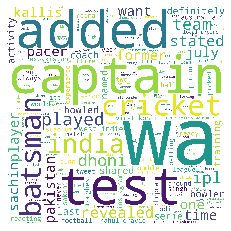

In [25]:
wc = WordCloud(background_color='white', width=3600, height=3600)
img = wc.generate(sports_words)

plt.imshow(img)
plt.axis('off')

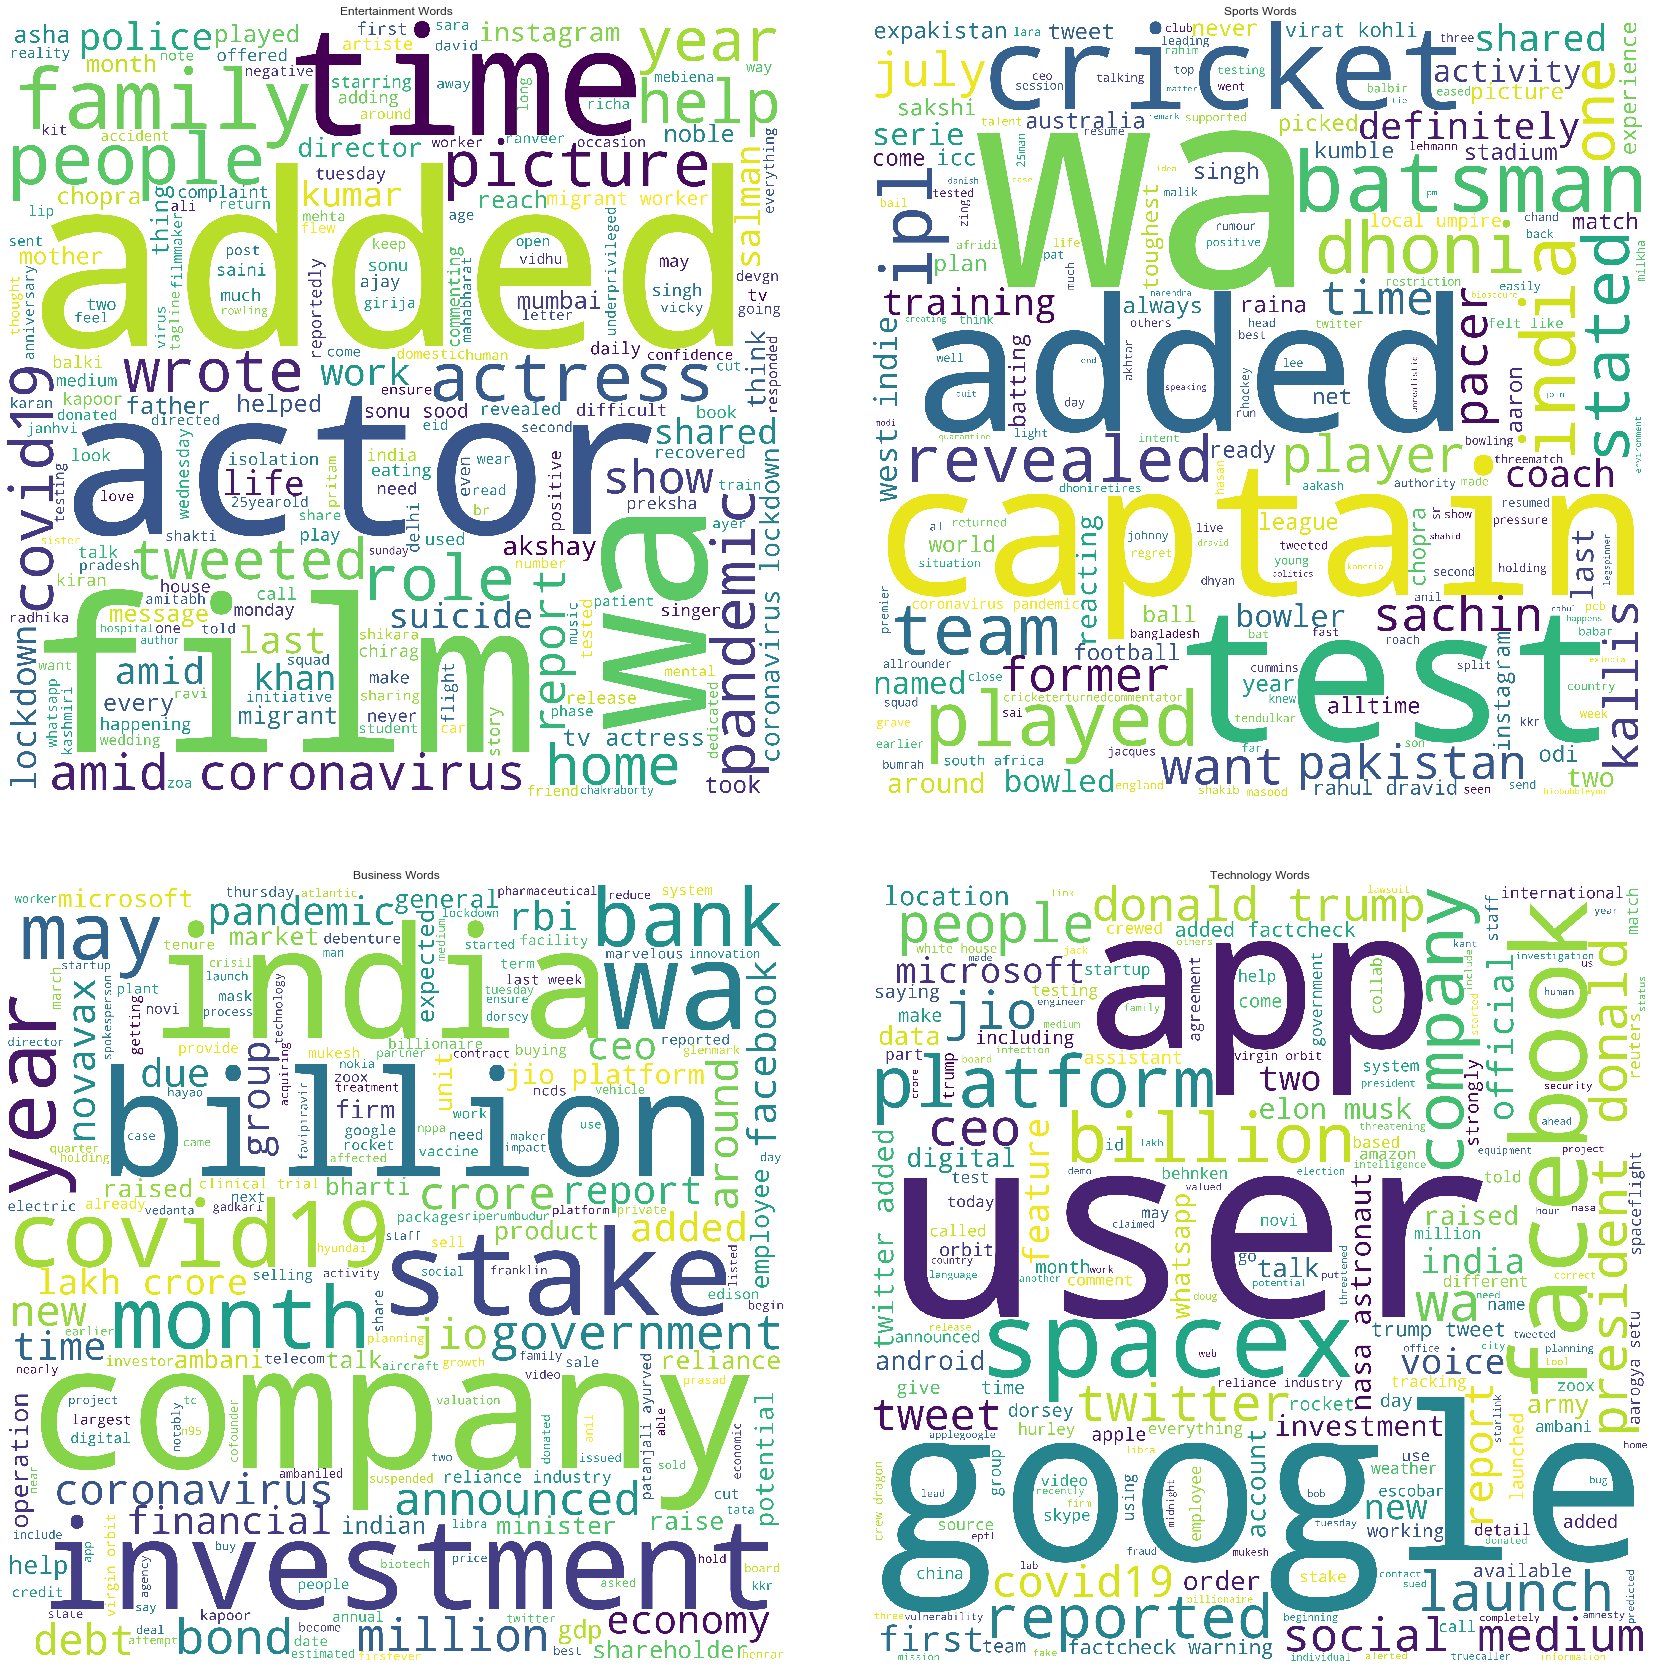

In [26]:
business_wc = WordCloud(background_color='white', width=3600, height=3600).generate(business_words)
entertainment_wc = WordCloud(background_color='white', width=3600, height=3600).generate(entertainment_words)
technology_wc = WordCloud(background_color='white', width=3600, height=3600).generate(technology_words)
sports_wc = WordCloud(background_color='white', width=3600, height=3600).generate(sports_words)

plt.figure(figsize=(24, 24))
axs = [plt.axes([0, 0, .45, .45]), plt.axes([0, .5, .45, .45]), plt.axes([.5, 0, .45, .45]), plt.axes([.5, .5, .45, .45])]

axs[0].imshow(business_wc)
axs[1].imshow(entertainment_wc)
axs[2].imshow(technology_wc)
axs[3].imshow(sports_wc)

axs[0].set_title('Business Words')
axs[1].set_title('Entertainment Words')
axs[2].set_title('Technology Words')
axs[3].set_title('Sports Words')

for ax in axs: ax.axis('off')